In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = os.path.join ( "data", "mouse_drug_data.csv")
clinical_data = os.path.join ("data", "clinicaltrial_data.csv")
df1 = pd.read_csv(mouse_data)
df2 = pd.read_csv(clinical_data)

# Read the Mouse and Drug Data and the Clinical Trial Data
# Combine the data into a single dataset
# Display the data table for preview

In [2]:
df3 = pd.merge(left=df2,right=df1, how='outer', left_on='Mouse ID', right_on='Mouse ID')
df3.head().style.format(
    {"Tumor Volume (mm3)":"{:.1f}"})

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,b128,5,45.7,0,Capomulin
2,b128,10,43.3,0,Capomulin
3,b128,15,43.8,0,Capomulin
4,b128,20,42.7,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
agg_df3 = df3.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":["mean"]}).reset_index()
agg_df3.columns = list(map(''.join, agg_df3.columns.values))
agg_df3 = agg_df3.rename(columns={"Tumor Volume (mm3)mean": "Tumor Volume (mm3)"})
agg_df3.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
agg_df4 = df3.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":["sem"]}).reset_index()
agg_df4.columns = list(map(''.join, agg_df4.columns.values))
agg_df4 = agg_df4.rename(columns={"Tumor Volume (mm3)sem": "Tumor Volume (mm3)"})
agg_df4.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_df3 = pd.pivot_table(agg_df3, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
pivot_df3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
pivot_df4 = pd.pivot_table(agg_df4, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
pivot_df4.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


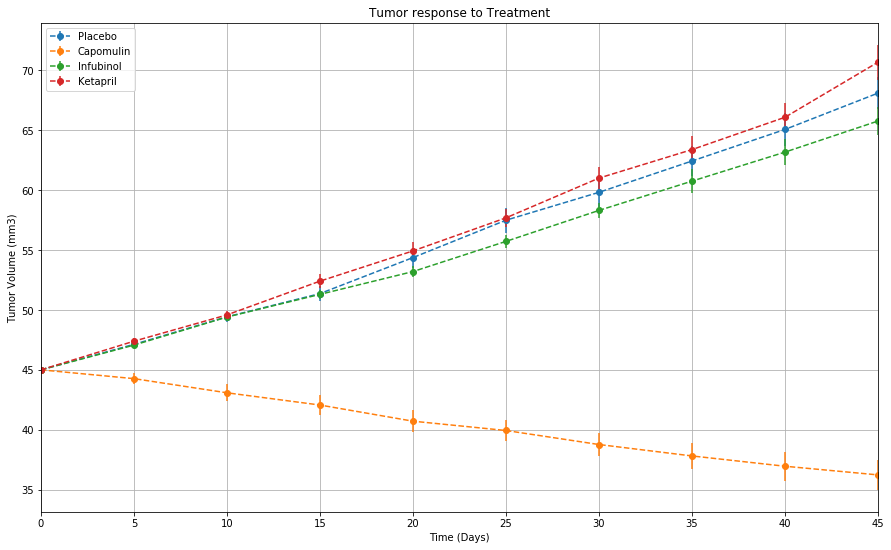

In [7]:
# Generate the Plot (with Error Bars)
# Save the Figure
pivot_df3[["Placebo","Capomulin", "Infubinol", "Ketapril"]]\
          .plot(kind='line', figsize = (15, 9), grid=True, 
                yerr = pivot_df4, marker='o', linestyle="--")
plt.title("Tumor response to Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='upper left')
plt.savefig("Tumor response to Treatment BG.png")
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
agg_df5 = df3.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":["mean"]}).reset_index()
agg_df5.columns = list(map(''.join, agg_df5.columns.values))
agg_df5 = agg_df5.rename(columns={"Metastatic Sitesmean": "Metastatic Sites"})
agg_df5.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
agg_df6 = df3.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":["sem"]}).reset_index()
agg_df6.columns = list(map(''.join, agg_df5.columns.values))
agg_df6 = agg_df6.rename(columns={"Metastatic Sitessem": "Metastatic Sites"})
agg_df6.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_df5 = pd.pivot_table(agg_df5, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
pivot_df5.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
pivot_df6 = pd.pivot_table(agg_df6, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
pivot_df6.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


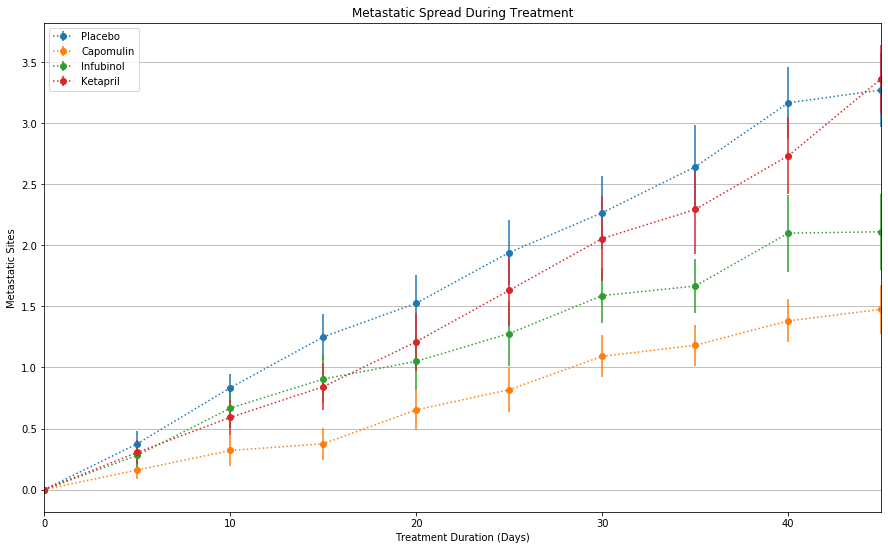

In [12]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
pivot_df5[["Placebo","Capomulin", "Infubinol", "Ketapril"]]\
          .plot(kind='line', figsize = (15, 9), 
                yerr = pivot_df6, marker='o', linestyle="dotted")
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.xticks(np.arange(0, 50, step=10))
plt.savefig("Metastatic Spread During Treatment.png")
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
agg_df7 = df3.groupby(["Drug","Timepoint"]).agg({"Mouse ID":["count"]}).reset_index()
agg_df7.columns = list(map(''.join, agg_df7.columns.values))
agg_df7 = agg_df7.rename(columns={"Mouse IDcount": "Mouse Count"})
agg_df7.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
pivot_df7 = pd.pivot_table(agg_df7, values='Mouse Count', index=['Timepoint'], columns=['Drug'])
pivot_df7.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
pivot_df8 = pivot_df7.loc[0,:]
for column in pivot_df7:
    pivot_df7[column] = pivot_df7[column] / pivot_df8[column] * 100
    
pivot_df7.round()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.0,92.0,73.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,69.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.0,84.0,62.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,35.0,80.0,46.0,56.0


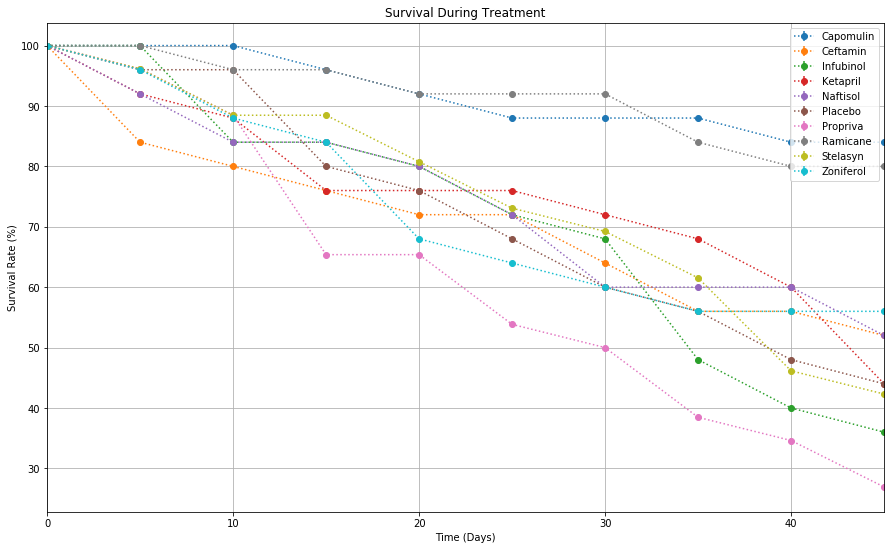

In [16]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
pivot_df7.plot(kind='line', figsize = (15, 9), grid=True, 
                yerr = pivot_df6, marker='o', linestyle="dotted")
plt.title("Survival During Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 50, step=10))
plt.savefig("Survival During Treatment.png")
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
# Display the data to confirm

In [18]:
percent_change_df = ((pivot_df3.iloc[-1] - pivot_df3.iloc[0]) / pivot_df3.iloc[0]) * 100
percent_change_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

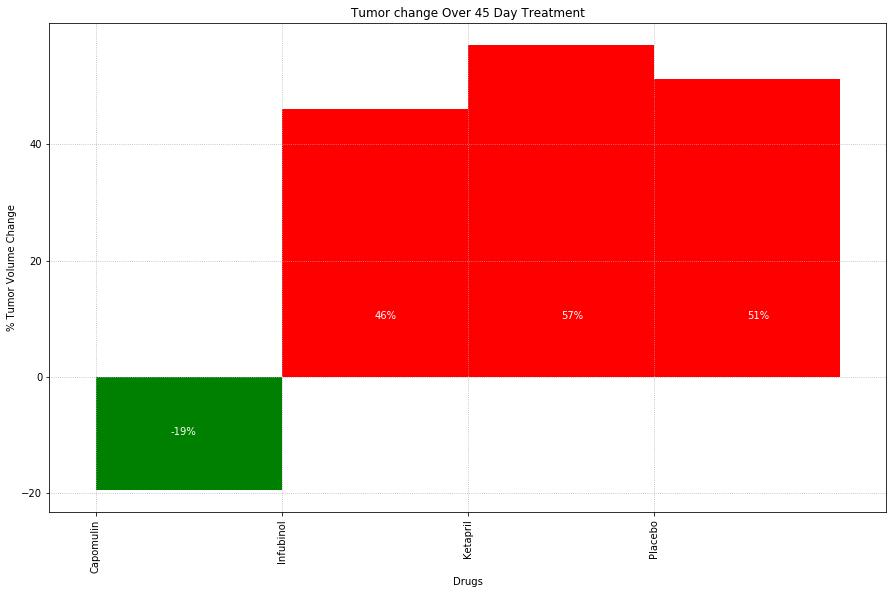

In [19]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure
percent_change_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]\
                 .plot(kind="bar", figsize = (15, 9), title ="Tumor change Over 45 Day Treatment", 
                 color = ['g', 'r', 'r', 'r'], grid=True, align='edge', width=1)
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drugs")
plt.grid(linestyle='dotted')
plt.yticks(np.arange(-20, 60, step=20))
plt.text(0.4,-10,'-19%', color='white')
plt.text(1.5,10,'46%', color='white')
plt.text(2.5,10,'57%', color='white')
plt.text(3.5,10,'51%', color='white')
plt.savefig("Tumor change Over 45 Day Treatment.png")
plt.show()